In [582]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [583]:
#Check for number of rows and columns
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_raw = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)


(7043, 21)


# VIEW INFO

In [584]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [586]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# CLEANING

In [587]:
# Convert to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many were converted to NaN
print(df['TotalCharges'].isna().sum())

#view which rows were converted to NaN
print(df[df['TotalCharges'].isna()])

11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  .

In [588]:
#Fill TotalCharges with no number with monthly charges x tenure length
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])

#check if any remain
print(df['TotalCharges'].isna().sum())

#Another option is to drop those with no NaN
# df['TotalCharges'].dropna(subset=['TotalCharges'])


0


In [589]:
#drop customer ID column(not needed)
df = df.drop('customerID', axis=1)

In [590]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Churn'] 
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [591]:
# print(df['TechSupport'].unique())

In [592]:
#convert yes/no to binary input(1 and 0)
binary_columns = ['Partner', 'Dependents', 'PhoneService',  'PaperlessBilling', 'Churn']

for each in binary_columns :
    df[each] = df[each].map({'Yes': 1, 'No': 0})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


# EXPLORATORY VISUALS

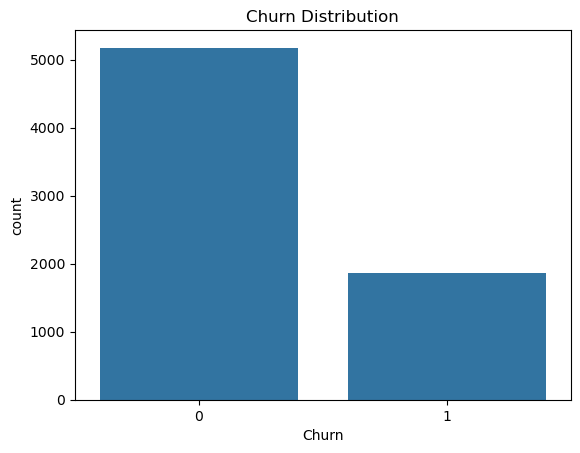

In [593]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# Optional: print percentage
# churn_rate = df['Churn'].mean()
# print(f"Churn rate: {churn_rate:.2%}")


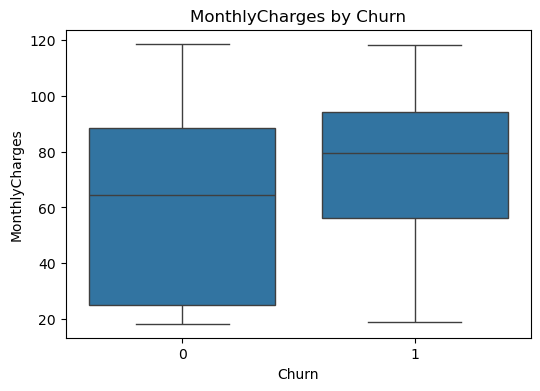

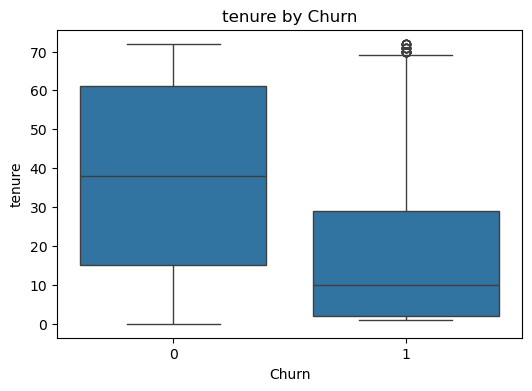

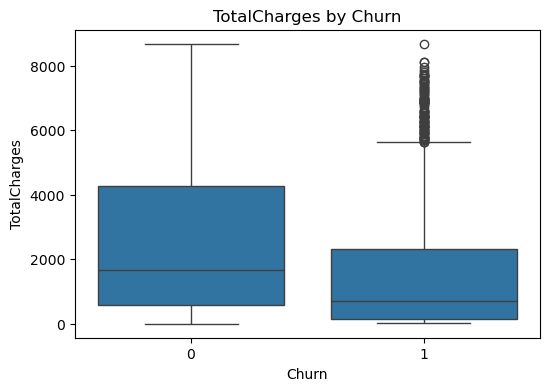

In [594]:
num_cols = ['MonthlyCharges', 'tenure', 'TotalCharges']

for col in num_cols: 
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

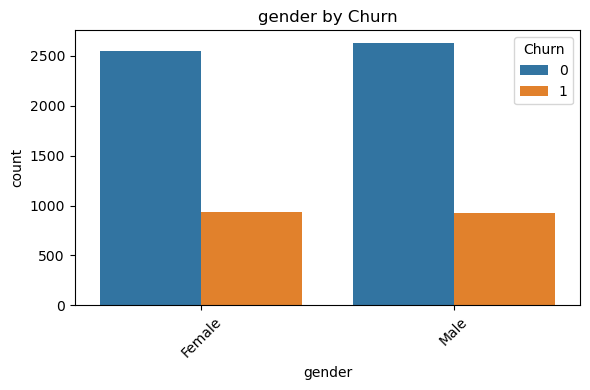

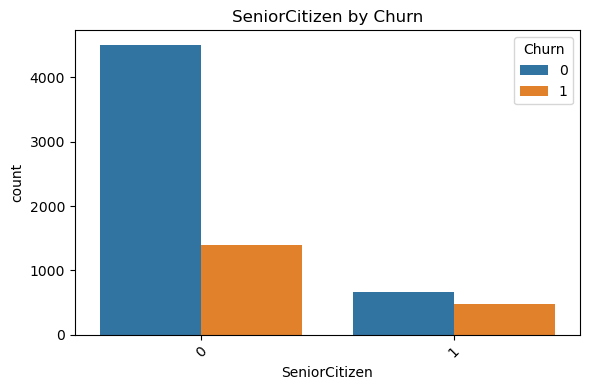

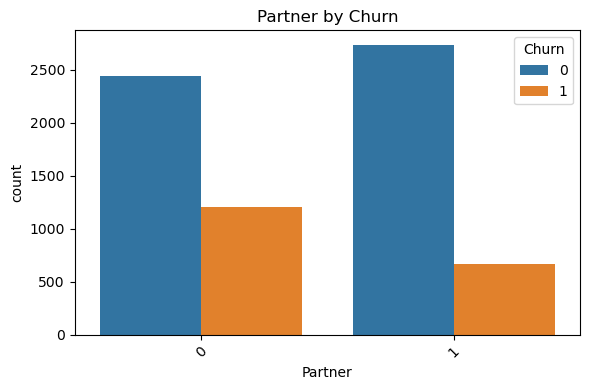

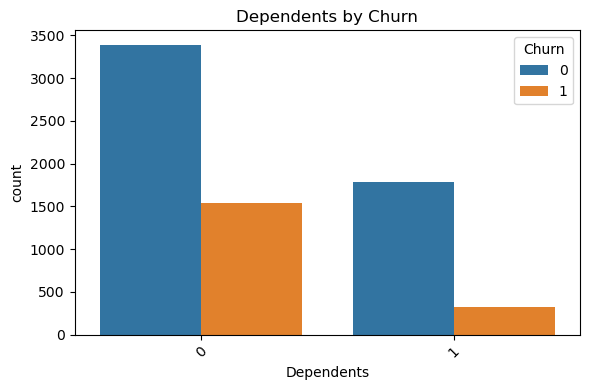

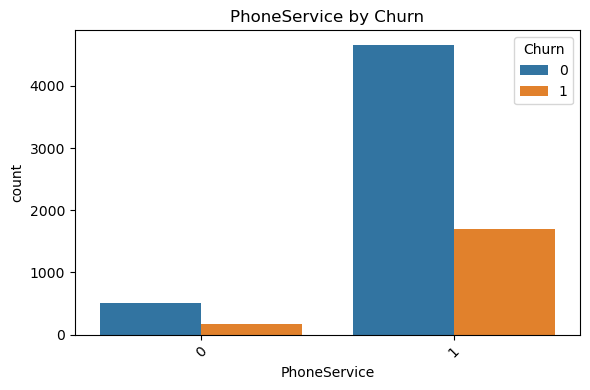

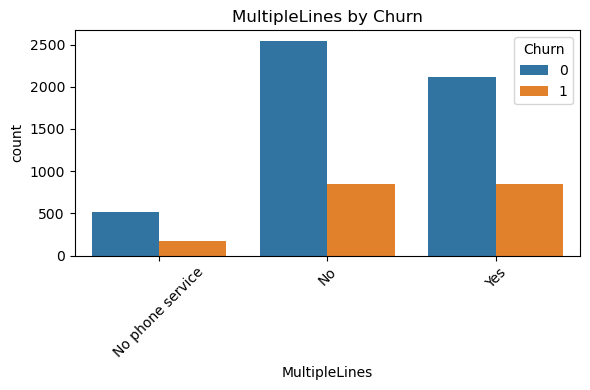

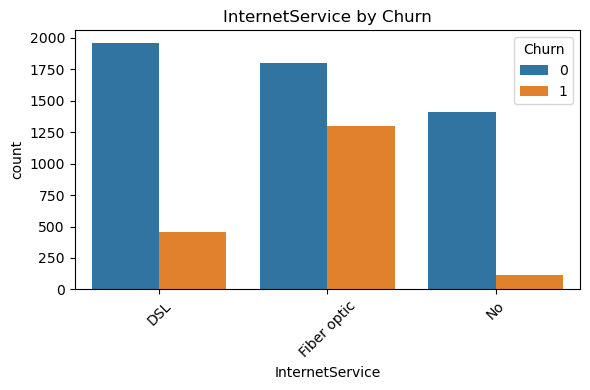

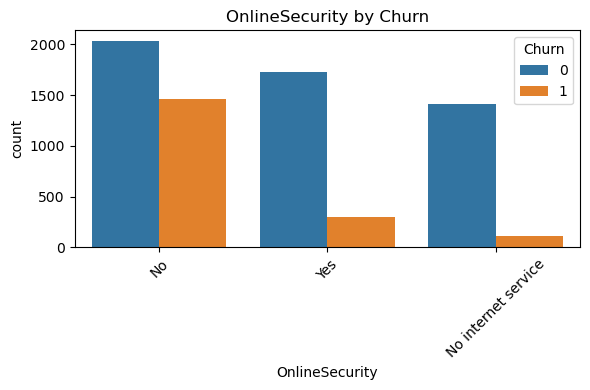

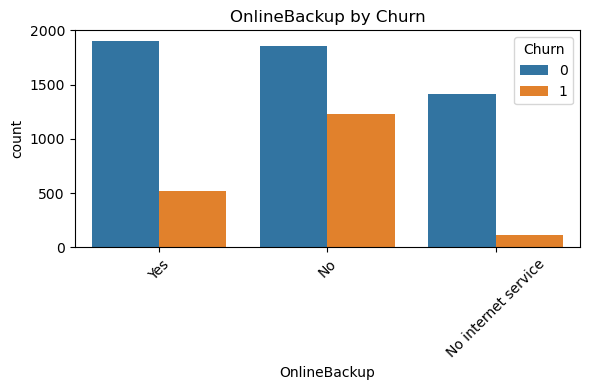

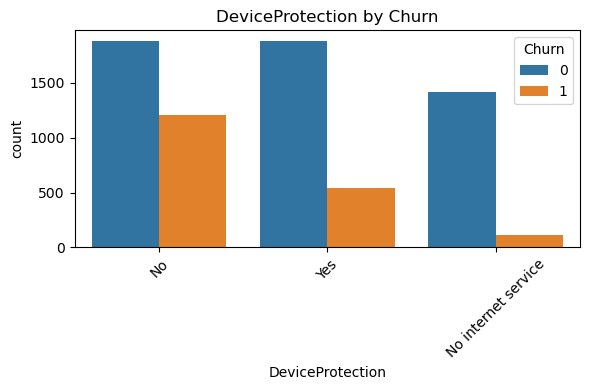

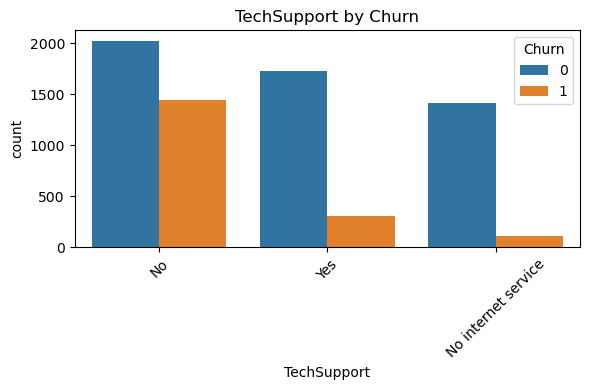

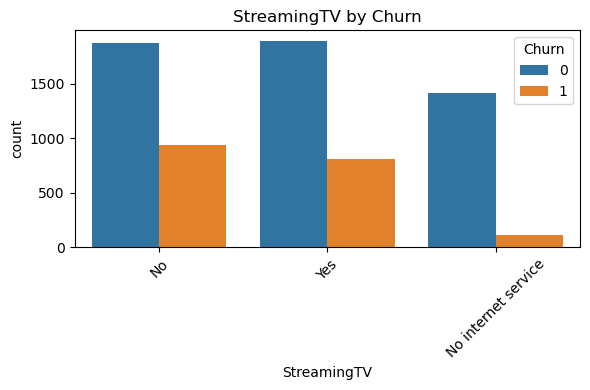

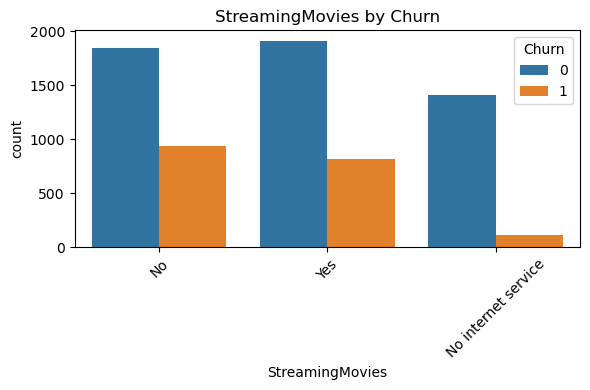

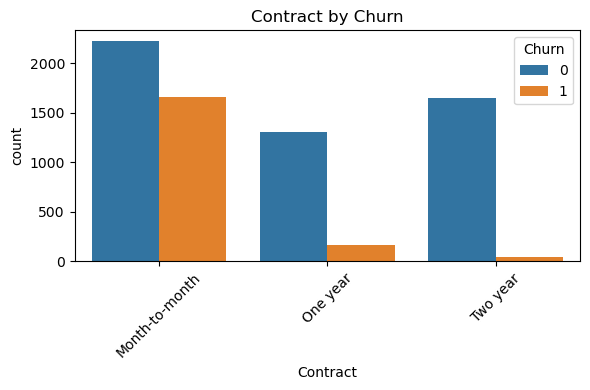

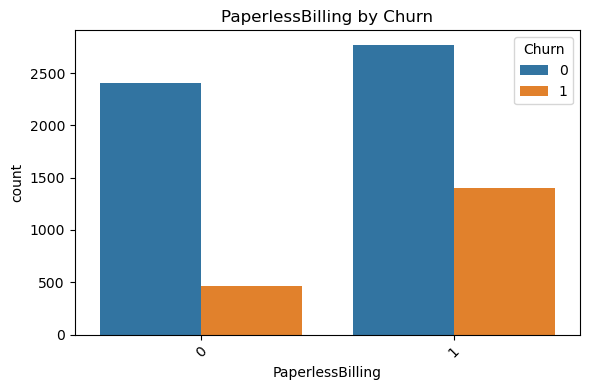

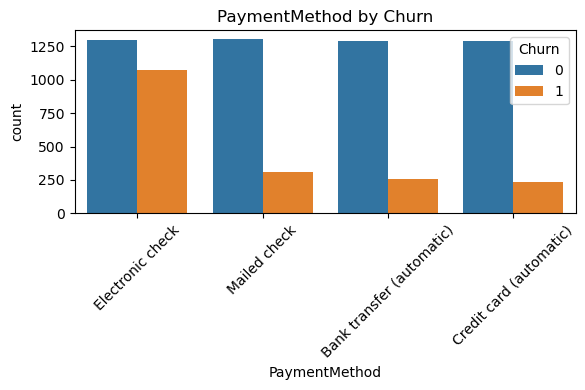

In [595]:
cat_cols_plots = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols_plots:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [596]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [597]:
# print(df.info())
# print(df.dtypes)
print(df.columns.tolist())


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_1', 'Dependents_1', 'PhoneService_1', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_1', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [598]:
df.to_csv("../data/processed/clean_telco.csv", index=False)


In [599]:
#sanity check
print(df['Churn'].count())


7043


# MODELLING

In [600]:
#separate X(Features) and y(target)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [601]:
from sklearn.model_selection import train_test_split

#Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [602]:
from sklearn.preprocessing import StandardScaler

#scale data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTIC REGRESSION 
## TRAIN MODEL

In [603]:
from sklearn.linear_model import LogisticRegression

#using logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [604]:
#Test prediction 
y_pred = lr_model.predict(X_test_scaled)

#confidence and probabilty 
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]


In [605]:
from sklearn.metrics import accuracy_score

#METRICS: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8069552874378992


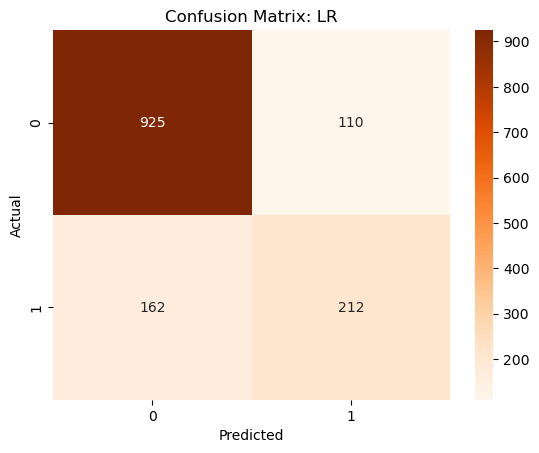

In [606]:
from sklearn.metrics import confusion_matrix

#METRICS: Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: LR")
plt.show()

In [607]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



ROC AUC Score: 0.841778397788628


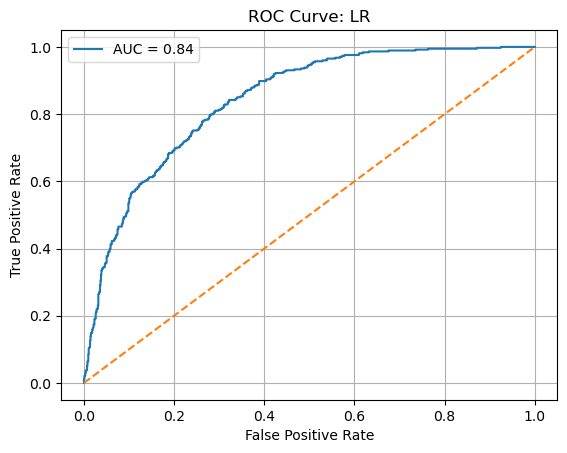

In [608]:
from sklearn.metrics import roc_auc_score, roc_curve

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: LR")
plt.legend()
plt.grid(True)
plt.show()


## LOGISTIC REGRESSION TUNING (RANDOMIZEDSEARCHCV)

In [609]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

lr_model2 = LogisticRegression(solver='liblinear')

param_dist = {
    'penalty': ['l1', 'l2'],
    'C': loguniform(1e-3, 100)
}

lr_search = RandomizedSearchCV(
    lr_model2, 
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=1
)

lr_search.fit(X_train_scaled, y_train)

best_lr = lr_search.best_estimator_

y_pred_lr_hyp = lr_search.predict(X_test_scaled)
y_pred_prob_lr_hyp = best_lr.predict_proba(X_test_scaled)[:,1]

lr_accuracy_hyp = accuracy_score(y_test, y_pred_lr_hyp)
print("Tuned Logistic Regression Accuracy: ", lr_accuracy_hyp)
auc_lr_tunes = roc_auc_score(y_test, y_pred_prob_lr_hyp)
print("Tuned Logistic Regression AUC: ", auc_lr_tunes)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned Logistic Regression Accuracy:  0.8019872249822569
Tuned Logistic Regression AUC:  0.8410085509829757


# RANDOM FOREST CLASSIFIER
## TRAIN MODEL

In [610]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [611]:
# Test prediction
y_pred_rf = rf_model.predict(X_test_scaled)
# Confidence and probability
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [612]:
# Metrics: Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf)

Random Forest Accuracy:  0.7892122072391767


Text(0.5, 1.0, 'Confusion Matrix: RF')

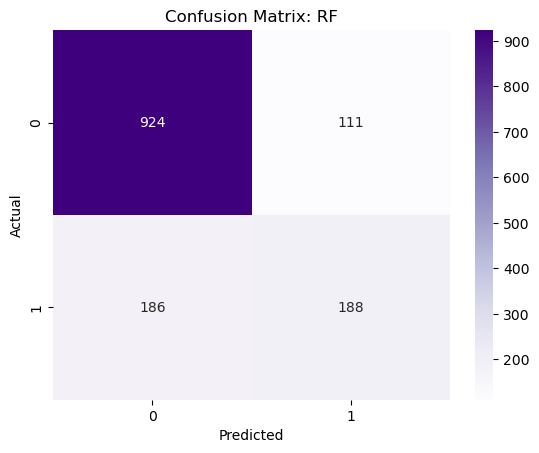

In [613]:
# Metrics: Confusion Matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: RF')

In [614]:
#Metric: Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Random Forest AUC: 0.8244232607403964


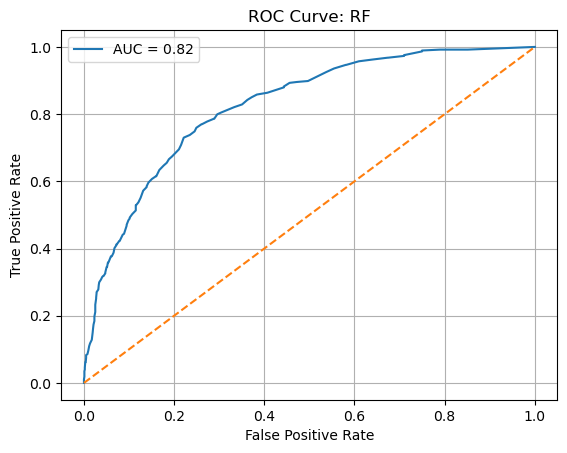

In [615]:
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest AUC:", auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: RF")
plt.legend()
plt.grid(True)
plt.show()

## RANDOM FOREST CLASSIFIER TUNING (RANDOMIZEDSEARCHCV)

In [618]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

rf_model2 = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    rf_model2,
    param_distributions=param_dist_rf,
    n_iter=20, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_



y_pred_rf_hyp = rf_search.predict(X_test_scaled)
y_pred_prob_rf_hyp = best_rf.predict_proba(X_test_scaled)[:,1]

rf_accuracy_hyp = accuracy_score(y_test, y_pred_rf_hyp)
print("Tuned RF Accuracy: ", rf_accuracy_hyp)
auc_rf_tuned = roc_auc_score(y_test, y_pred_prob_rf_hyp)
print("Tuned RF AUC: ", auc_rf_tuned)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuned RF Accuracy:  0.8062455642299503
Tuned RF AUC:  0.8431605053088429


# XGBoost
## TRAIN MODEL

In [568]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

[13:37:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [569]:
#Test prediction
y_pred_xgb = xgb_model.predict(X_test_scaled)
#Confidence and Probability
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [570]:
# Metrics: Accuracy
print("XGBoost Accuracy", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy 0.7721788502484032


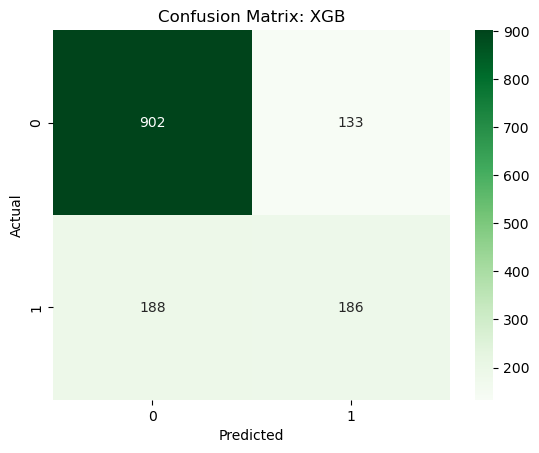

In [572]:
#Metrics: Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: XGB')
plt.show()

In [573]:
#Metrics: Classification Report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



XGBoost AUC: 0.8223836833811259


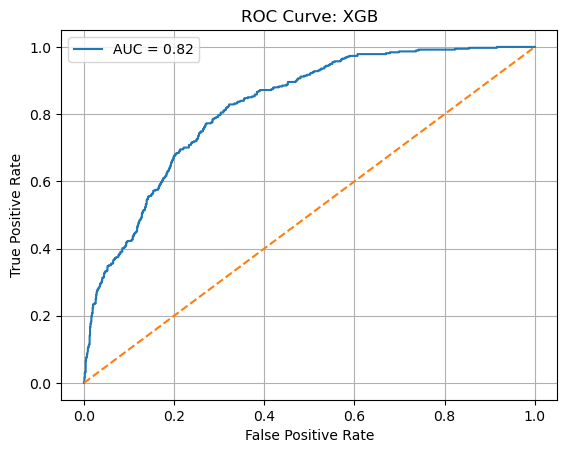

In [574]:
# Metrics
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("XGBoost AUC:", auc_xgb)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve: XGB")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

## XGBOOST CLASSIFIER TUNING (RANDOMIZEDSEARCHCV)

In [ ]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_model2 = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(
    xgb_model2,
    param_distributions=param_dist_xgb,
    n_iter=20,  
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_scaled)
y_pred_prob_xgb = best_xgb.predict_proba(X_test_scaled)[:,1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("Tuned XGBoost Accuracy: ", acc_xgb)
print("Tuned XGBoost AUC: ", auc_xgb)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
